**Analizando canciones en Spotify con dask**

Tiene una lista de archivos CSV que desea agregar para investigar el catálogo de música de Spotify.

Es importante destacar que desea poder hacer esto rápidamente y utilizar toda su potencia informática disponible para hacerlo.

Cada archivo CSV contiene todas las canciones lanzadas en un año determinado y cada fila brinda información sobre una canción individual.

dasky delayed() se han importado para usted, y la lista de nombres de archivos está disponible en su entorno como filenames. pandasha sido importado como pd.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import dask
from dask import delayed

os.chdir('spotify')
%ls

 El volumen de la unidad C es OS
 El número de serie del volumen es: 2283-15A7

 Directorio de C:\Users\indra\Documents\Github\Resumenes-Python\17_Dask\spotify

19/08/2022  12:14 a. m.    <DIR>          .
20/08/2022  08:59 p. m.    <DIR>          ..
19/08/2022  12:14 a. m.           666,495 2005_tracks.csv
19/08/2022  12:14 a. m.         1,017,535 2006_tracks.csv
19/08/2022  12:14 a. m.         1,025,131 2007_tracks.csv
19/08/2022  12:14 a. m.         1,143,021 2008_tracks.csv
19/08/2022  12:14 a. m.         1,115,136 2009_tracks.csv
19/08/2022  12:14 a. m.         1,129,611 2010_tracks.csv
19/08/2022  12:14 a. m.         1,141,184 2011_tracks.csv
19/08/2022  12:14 a. m.         1,158,224 2012_tracks.csv
19/08/2022  12:14 a. m.         1,264,548 2013_tracks.csv
19/08/2022  12:14 a. m.         1,349,637 2014_tracks.csv
19/08/2022  12:14 a. m.         1,268,323 2015_tracks.csv
19/08/2022  12:14 a. m.         1,313,592 2016_tracks.csv
19/08/2022  12:14 a. m.         1,163,416 2017_tracks.

Lectura de datos sin dask.

In [12]:
%%timeit
files = os.listdir()[:-1]

sizes = []
columns = []
n = []

for file in files:
    df = pd.read_csv(file)
    size = df.shape[0]
    sizes.append(size)
    
    column = df.shape[1]
    columns.append(column)
    
    n.append((df['key'] == 'C').sum()) #Más abajo contamos las columnas que tienen una letra C en la columna key, pero con delayed.

296 ms ± 7.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
#Número de filas por archivo
tmp = pd.DataFrame(zip(files,sizes,columns,n), columns = ["file","rows","columns","n"])
tmp

,file,rows,columns,n
0,2005_tracks.csv,5728,12,702
1,2006_tracks.csv,8751,12,1091
2,2007_tracks.csv,8770,12,1054
3,2008_tracks.csv,9714,12,1221
4,2009_tracks.csv,9593,12,1215
5,2010_tracks.csv,9597,12,1189
6,2011_tracks.csv,9689,12,1173
7,2012_tracks.csv,9744,12,1184
8,2013_tracks.csv,10557,12,1274
9,2014_tracks.csv,11252,12,1320


In [19]:
print("Cantidad de registros : ", sum(tmp["rows"]))
print("Cantidad de columnas con una C : ", sum(tmp["n"]))

Cantidad de registros :  161738
Cantidad de columnas con una C :  19125


In [11]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,key,acousticness,instrumentalness,tempo
0,0VoyCzfd4M5p23pu5HL1Vy,Can't Stop This Feeling (Deep House Dance Part...,25,185803,0,['Greg Sletteland'],2020-01-01,0.637,G#,0.008390,0.077700,123.912
1,2m50HsnzEczYBaYrcf7duI,מים שקופים,48,180880,0,['Omer Adam'],2020-01-01,0.625,B,0.470000,0.000000,91.606
2,1HibPS9XZcq91JkEFVNdHx,המלכה של השכונה,41,155427,0,['Omer Adam'],2020-01-01,0.786,F#,0.241000,0.000000,111.992
3,1QD7KtRE3D1IUHhPsSRpz5,I Have a Dream (Deep House Dance Party Remix),25,141640,0,['Greg Sletteland'],2020-01-01,0.809,G,0.011900,0.837000,122.010
4,5pFAe3583L3RgD4UBczqrC,Searching,0,254280,0,['The Silent Deeds'],2020-01-01,0.421,E,0.000855,0.000213,125.004


In [18]:
type(df)

pandas.core.frame.DataFrame

**Lectura de datos con delayed**

In [20]:
%%timeit
files = os.listdir()[:-1]

sizes = []
columns = []

for file in files:
    df = delayed(pd.read_csv)(file)
    size = df.shape[0]
    sizes.append(size)
    
    column = df.shape[1]
    columns.append(column)

2.32 ms ± 69.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Gracias al delayed la lectura de datos no se ejecuta cada vez en el for.

Soló se evalua la última vez cuando es necesario tener el último dataframe.

Pasando de tener 300ms a 2.32ms

In [21]:
sizes[:5]

[Delayed('getitem-47ed92ff8821ed1351fe22b58915c533'),
 Delayed('getitem-9b040aa4054e32a38b41cb1f0b1989d5'),
 Delayed('getitem-cf266561a7b40ad45d3c7cba5ebb809f'),
 Delayed('getitem-4222c252fae9e39090dc6d485a18f5a1'),
 Delayed('getitem-de22f7cfecdd2e336bc432d084628058')]

In [23]:
type(df)

dask.delayed.Delayed

In [24]:
df

Delayed('read_csv-fa429d28-c8e0-4c00-a073-6db3f152c8ec')

#### Iterando de forma perezosa por cada dataframe.

Calculando de manera eficiente el número total de canciones y el número total de canciones con C, asegurándose de que cada archivo se cargue solo una vez.

- Encuentramos el número de canciones en cada archivo que tienen una letra 'C' en columna *key* y se agrega al total acumulado n_songs_in_c.

In [14]:
n_songs_in_c, n_songs = 0, 0 

for file in files:
    # Load in the data
    df = delayed(pd.read_csv)(file)
    
    # Add to running totals
    n_songs_in_c += (df['key'] == 'C').sum() #Filas con una C
    n_songs += df.shape[0] #Cantidad de registros

In [18]:
print("Cantidad de registros : ", n_songs.compute())
print("Cantidad de columnas con una C : ", n_songs_in_c.compute())

Cantidad de registros :  161738
Cantidad de columnas con una C :  19125


In [21]:
# Calculando de forma eficiente el númro total de canciones y el porcenteje de canciones con una C.
total_n_songs_in_c, total_n_songs = dask.compute(n_songs_in_c, n_songs)

fraction_c = total_n_songs_in_c / total_n_songs
print(total_n_songs, fraction_c)

161738 0.11824679419802396


**¿Qué tan bailables son las canciones en estos días?**

Es hora de profundizar en los datos de Spotify para analizar algunas tendencias en la música.

En cada archivo CSV, la 'danceability'columna contiene la puntuación entre 0 y 1 de lo bailable que es cada canción.

La partitura describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales, incluidos el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general.

*¿Crees que las canciones están mejorando o empeorando para bailar?*

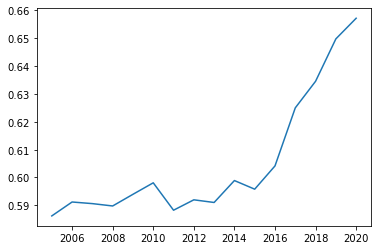

In [31]:
danceabilities = []

for file in files:
    #Evaluación perezosa
    df = delayed(pd.read_csv)(file)
    
    mean_danceability = df['danceability'].mean()
    danceabilities.append(mean_danceability)

danceability_list = dask.compute(danceabilities)[0]

years = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
plt.plot(years, danceability_list)
plt.show()

**Canciones más populares**

Tiene una tarea más en estos datos de Spotify, que es encontrar las 10 canciones más populares en todos los años disponibles.

El algoritmo que deberá usar para calcular esto es calcular las 10 mejores canciones de cada año, y luego combinarlas y encontrar las 10 mejores de las 10 principales.

In [35]:
#La siguiente función, que encuentra las 10 mejores canciones en un DataFrame.
def top_10_most_popular(df):
  return df.nlargest(n=10, columns='popularity')

In [42]:
top_songs = []

for file in files:
    df = delayed(pd.read_csv)(file)
    # Find the top 10 most popular songs in this file
    df_top_10 = top_10_most_popular(df)
    top_songs.append(df_top_10)

# Compute the list of top 10s
top_songs_list = dask.compute(top_songs)[0]

# Concatenate them and find the best of the best
top_songs_df = pd.concat(top_songs_list)
df_all_time_top_10 = top_10_most_popular(top_songs_df)
df_all_time_top_10

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,key,acousticness,instrumentalness,tempo
2257,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],2020-03-20,0.680,C,0.02120,0.000012,118.051
11698,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],2020-12-04,0.653,B,0.11200,0.000000,83.970
2280,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],2020-03-20,0.514,C#,0.00146,0.000095,171.005
7835,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],2020-09-16,0.798,G#,0.41400,0.019200,120.031
9090,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],2019-11-07,0.749,B,0.20800,0.037100,90.028
2489,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],2020-03-27,0.449,C,0.52400,0.000001,89.087
10238,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,94,161385,1,['The Kid LAROI'],2020-11-06,0.662,C,0.21300,0.000000,93.005
11850,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']",2020-12-10,0.713,G#,0.12200,0.000000,168.021
11238,2XIc1pqjXV3Cr2BQUGNBck,LA NOCHE DE ANOCHE,93,203201,0,"['Bad Bunny', 'ROSALÍA']",2020-11-27,0.856,G,0.03030,0.000000,81.993
13368,3YJJjQPAbDT7mGpX3WtQ9A,Good Days,93,279204,1,['SZA'],2020-12-25,0.436,C#,0.49900,0.000008,121.002


In [44]:
top_songs_df.head(40)

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,key,acousticness,instrumentalness,tempo
637,2Lhdl74nwwVGOE2Gv35QuK,Cupid's Chokehold / Breakfast in America,87,243773,0,['Gym Class Heroes'],2005-02-22,0.720,C#,0.237000,0.000000,78.953
5125,3ZFTkvIE7kyPt6Nu3PEa7V,Hips Don't Lie (feat. Wyclef Jean),84,218093,0,"['Shakira', 'Wyclef Jean']",2005-11-28,0.778,A#,0.284000,0.000000,100.024
2032,0d28khcov6AiegSCpG5TuT,Feel Good Inc.,83,222640,0,['Gorillaz'],2005-05-23,0.818,F#,0.008360,0.002330,138.559
2254,7LVHVU3tWfcxj5aiPFEW4Q,Fix You,83,295533,0,['Coldplay'],2005-06-07,0.209,D#,0.164000,0.001960,138.178
3755,5fVZC9GiM4e8vu99W0Xf6J,How to Save a Life,83,262533,0,['The Fray'],2005-09-13,0.640,A#,0.269000,0.000000,122.035
805,5D2mYZuzcgjpchVY1pmTPh,Candy Shop,80,209107,1,"['50 Cent', 'Olivia']",2005-03-03,0.614,B,0.025300,0.000032,125.173
1750,2TfSHkHiFO4gRztVIkggkE,"Sugar, We're Goin Down",80,229093,0,['Fall Out Boy'],2005-05-03,0.494,G,0.005790,0.000000,162.011
3467,4TsmezEQVSZNNPv5RJ65Ov,Pon de Replay,80,246960,0,['Rihanna'],2005-08-29,0.779,G,0.000155,0.000770,99.019
3489,1PS1QMdUqOal0ai3Gt7sDQ,Gold Digger,79,207627,1,"['Kanye West', 'Jamie Foxx']",2005-08-30,0.629,C#,0.019500,0.000000,93.034
4040,0k2GOhqsrxDTAbFFSdNJjT,Temperature,79,218573,0,['Sean Paul'],2005-09-26,0.951,C,0.106000,0.000000,125.040


¡Genial!

La forma en que se calcularon las cosas aquí fue ligeramente diferente a la anterior. 

En lugar de construir *df_all_time_top_10* perezosamente y calcular la respuesta final, ejecutó la *compute()* función en una lista de los 10 principales y luego los combinó más tarde con una evaluación normal línea por línea.

Este fue un buen enfoque para este problema.

En general, debe hacer que sus datos no sean perezosos tan pronto como quepan en la memoria.